In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sem

In [ ]:
# Read the csvs into dataframes
df_wastewater_county = pd.read_csv('resources/wastewater_by_county.csv', parse_dates = True)
df_cases_county = pd.read_csv('resources/cases_by_county.csv', parse_dates = True)

# Convert dates into datetime format
df_wastewater_county['sampling_week'] = pd.to_datetime(df_wastewater_county['sampling_week'])
df_cases_county['date'] = pd.to_datetime(df_cases_county['date'])

# Display the dataframes
display(df_wastewater_county.head())
display(df_cases_county.head())


In [ ]:
# Get basic info about the dataframes
display(df_wastewater_county.info())
display(df_wastewater_county.shape)
display(df_cases_county.info())
display(df_cases_county.shape)


In [ ]:

# Rename the columns in the dataframes to make the graphs look better
df_wastewater_county = df_wastewater_county.rename(columns = {'effective_concentration_rolling_average': 
                                                              'Antigens in Wastewater',
                                                              'name' :
                                                              'County Name',
                                                              'sampling_week':
                                                              'Date',
                                                              'state':
                                                              'State',
                                                              'region':
                                                              'Region',
                                                              'fipscode':
                                                              'Fipscode'})

df_cases_county = df_cases_county.rename(columns = {'rolling_average_cases_per_100k':
                                                    'Rolling Average Cases per 100K',
                                                    'name':
                                                    'County Name',
                                                    'date':
                                                    'Date',
                                                    'state':
                                                    'State',
                                                    'region':
                                                    'Region',
                                                    'fipscode':
                                                    'Fipscode'})

# Display the new column names
display(df_wastewater_county.head())
display(df_cases_county.head())



In [ ]:
# Combine the two dataframes and set the index to the date.
df_county = pd.concat([df_wastewater_county, df_cases_county], axis='rows', ignore_index=True)

# Set index to date
df_county = df_county.set_index('Date')

# Display the new dataframe
display(df_county.head())



In [ ]:
# Create a pivot table to compare the Antigens in Wastewater to the Rolling average of cases of covid by location.
df_pivot_state = df_county.pivot_table(values= ['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                 index= ['State'],
                                aggfunc= 'sum')

# Clean NA from pivot table
df_pivot_state = df_pivot_state.replace(0, np.nan)
df_pivot_state = df_pivot_state.dropna()

# Plot the pivot table
df_pivot_state.plot(kind = 'bar', 
                    y = 'Antigens in Wastewater', 
                    figsize=(20, 10),
                    title = 'Total Antigens in Wastewater by State')

df_pivot_state.plot(kind = 'bar', 
                    y = 'Rolling Average Cases per 100K', 
                    figsize=(20, 10), 
                    color = 'tab:Green',
                    title = 'Total Covid Cases by State')

df_pivot_state.plot(kind = 'bar', 
                    y = ['Antigens in Wastewater', 'Rolling Average Cases per 100K'], 
                    figsize=(20, 10), 
                    color = {'Rolling Average Cases per 100K':
                             'tab:green',
                             'Antigens in Wastewater': 'tab:blue'},
                    title = 'Total Antigens in Wastewater and Covid Cases by State')


In [ ]:
# Create a pivot table
df_pivot_date = df_county.pivot_table(values=['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean NA from pivot table
df_pivot_date = df_pivot_date.replace(0, np.nan)
df_pivot_date = df_pivot_date.dropna()

# Plot antigens and cases over time.
df_pivot_date.plot(kind= 'line', y = 'Antigens in Wastewater', title = 'Average Antigens in Wastewater over Time').grid()
df_pivot_date.plot(kind= 'line', y = 'Rolling Average Cases per 100K', title = 'Average Covid Cases over Time', color = 'tab:orange').grid()

fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot the first metric on the first y-axis (left side)
ax1.set_xlabel('Date')
ax1.set_ylabel('Antigens in Wastewater', color='tab:blue')
ax1.plot(df_pivot_date['Antigens in Wastewater'], color='tab:blue', label='Antigens in Wastewater')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
# Create a second y-axis sharing the same x-axis (right side)
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Average Cases per 100K', color='tab:orange')
ax2.plot(df_pivot_date['Rolling Average Cases per 100K'], color='tab:orange', label='Rolling Average Cases per 100K')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# Add a title and show the plot
plt.title("Average Antigens in Wastewater and Average Covid Cases over Time")
fig.tight_layout()  # To prevent labels from overlapping
plt.show()


In [ ]:
# MA had highest antigens, AR had most cases
df_highest_anti_state =  df_county.loc[df_county['State'] == 'MA']
df_highest_cases_state = df_county.loc[df_county['State'] == 'AR']

display(df_highest_anti_state.head())
display(df_highest_cases_state.head())



In [ ]:
# Time slice, both averages peak at the same time.

df_highest_anti_time = df_county.sort_index().loc['2021-10' : '2022-03', :]

# Read the table
display(df_highest_anti_time.head())


In [ ]:
# Create the pivot table for time slice
df_pivot_anti_high_time = df_highest_anti_time.pivot_table(values=['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                       index=['State'],
                                       aggfunc='sum')

# Clean the pivot table of NA
df_pivot_anti_high_time = df_pivot_anti_high_time.replace(0, np.nan)
df_pivot_anti_high_time = df_pivot_anti_high_time.dropna()

# Plot the pivot table
df_pivot_anti_high_time.plot(kind = 'bar', 
                    y = 'Antigens in Wastewater', 
                    figsize=(20, 10),
                    title = 'Total Antigens in Wastewater by State 10-21 - 03-22')

df_pivot_anti_high_time.plot(kind = 'bar', 
                    y = 'Rolling Average Cases per 100K', 
                    figsize=(20, 10), 
                    color = 'tab:Green',
                    title = 'Total Covid Cases by State 10-21 - 03-22')

df_pivot_anti_high_time.plot(kind = 'bar', 
                    y = ['Antigens in Wastewater', 'Rolling Average Cases per 100K'], 
                    figsize=(20, 10), 
                    color = {'Rolling Average Cases per 100K':
                             'tab:green',
                             'Antigens in Wastewater': 'tab:blue'},
                    title = 'Total Antigens in Wastewater and Covid Cases by State 10-21 - 03-22')

In [ ]:
# Create a pivot table for the data from MA for antigens
df_pivot_anti_high_state_anti = df_highest_anti_state.pivot_table(values=['Antigens in Wastewater'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_anti_high_state_anti = df_pivot_anti_high_state_anti.replace(0, np.nan)
df_pivot_anti_high_state_anti = df_pivot_anti_high_state_anti.dropna()

# Create a pivot table for the data from MA for cases
df_pivot_anti_high_state_cases = df_highest_anti_state.pivot_table(values=['Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_anti_high_state_cases = df_pivot_anti_high_state_cases.replace(0, np.nan)
df_pivot_anti_high_state_cases = df_pivot_anti_high_state_cases.dropna()

# Plot the tables
df_pivot_anti_high_state_anti.plot(title = 'Average Antigens Found in Wastewater in MA').grid()
df_pivot_anti_high_state_cases.plot(title = 'Average Covid Cases in MA').grid()

# Combine the tables and plot
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot the first metric on the first y-axis (left side)
ax1.set_xlabel('Date')
ax1.set_ylabel('Antigens in Wastewater', color='tab:blue')
ax1.plot(df_pivot_anti_high_state_anti['Antigens in Wastewater'], color='tab:blue', label='Antigens in Wastewater')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
# Create a second y-axis sharing the same x-axis (right side)
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Average Cases per 100K', color='tab:orange')
ax2.plot(df_pivot_anti_high_state_cases['Rolling Average Cases per 100K'], color='tab:orange', label='Rolling Average Cases per 100K')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# Add a title and show the plot
plt.title("Average Antigens Found in Wastewater and Average Covid Cases in MA")
fig.tight_layout()  # To prevent labels from overlapping
plt.show()


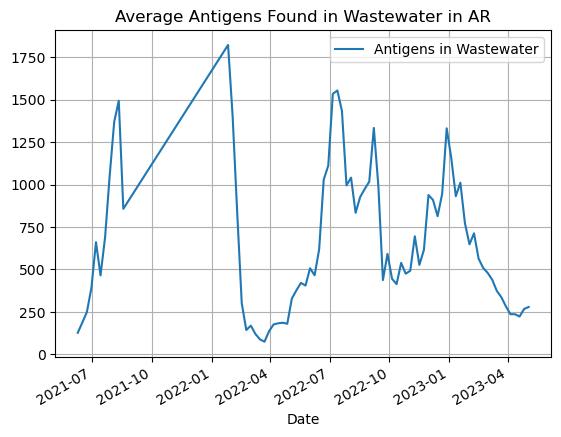

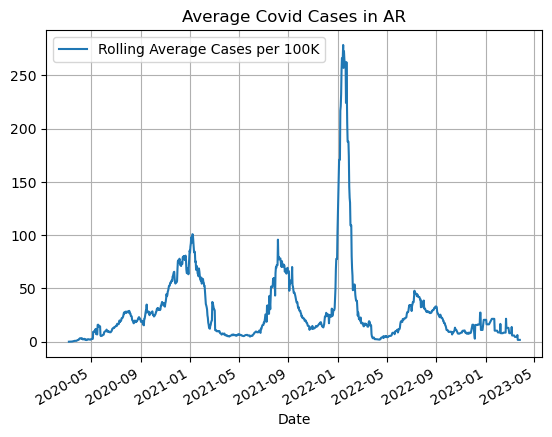

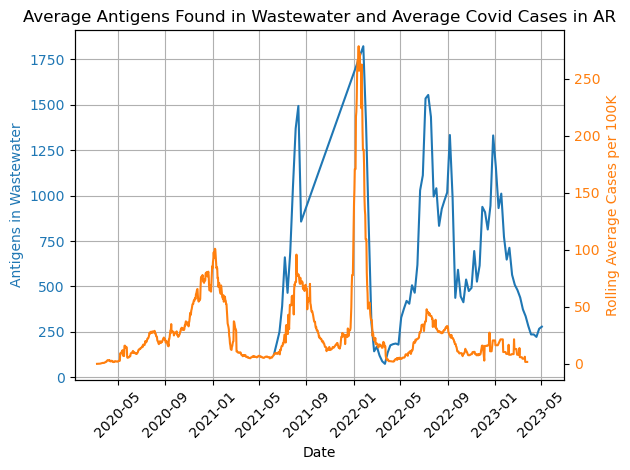

In [252]:
# Create a pivot table for the data from AR for antigens
df_pivot_cases_high_state_anti = df_highest_cases_state.pivot_table(values=['Antigens in Wastewater'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_cases_high_state_anti = df_pivot_cases_high_state_anti.replace(0, np.nan)
df_pivot_cases_high_state_anti = df_pivot_cases_high_state_anti.dropna()

# Create a pivot table for the data from AR for cases
df_pivot_cases_high_state_cases = df_highest_cases_state.pivot_table(values=['Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_cases_high_state_cases = df_pivot_cases_high_state_cases.replace(0, np.nan)
df_pivot_cases_high_state_cases = df_pivot_cases_high_state_cases.dropna()

# Plot the tables
df_pivot_cases_high_state_anti.plot(title = 'Average Antigens Found in Wastewater in AR').grid()
df_pivot_cases_high_state_cases.plot(title = 'Average Covid Cases in AR').grid()

# Combine the tables and plot
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot the first metric on the first y-axis (left side)
ax1.set_xlabel('Date')
ax1.set_ylabel('Antigens in Wastewater', color='tab:blue')
ax1.plot(df_pivot_cases_high_state_anti['Antigens in Wastewater'], color='tab:blue', label='Antigens in Wastewater')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
# Create a second y-axis sharing the same x-axis (right side)
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Average Cases per 100K', color='tab:orange')
ax2.plot(df_pivot_cases_high_state_cases['Rolling Average Cases per 100K'], color='tab:orange', label='Rolling Average Cases per 100K')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# Add a title and show the plot
plt.title("Average Antigens Found in Wastewater and Average Covid Cases in AR")
fig.tight_layout()  # To prevent labels from overlapping
plt.show()